In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [6]:
import numpy as np
import pandas as pd

In [7]:
df=pd.read_csv('D:\TunisiaLocalChapter_UEFAEURO2024\Datasets\match_team_statistics.csv')
df

,matchid,hometeamname,awayteamname,teamid,teamname,ishometeam,isawayteam,statsid,statsname,value,rank
0,2024442,Austria,North Macedonia,8,Austria,True,False,1,Goals,3,1
1,2024442,Austria,North Macedonia,8,Austria,True,False,2,Ball Possession,60,1
2,2024442,Austria,North Macedonia,8,Austria,True,False,3,Total Attempts,11,1
3,2024442,Austria,North Macedonia,8,Austria,True,False,4,Attempts on target,7,1
4,2024442,Austria,North Macedonia,8,Austria,True,False,5,Attempts off target,2,2
...,...,...,...,...,...,...,...,...,...,...,...
19189,2024448,Wales,Switzerland,128,Switzerland,False,True,650,Attempts on throw in,0,1
19190,2024448,Wales,Switzerland,128,Switzerland,False,True,651,Saves on attempts inside penalty area,1,2
19191,2024448,Wales,Switzerland,128,Switzerland,False,True,652,Saves on attempts outside penalty area,0,1
19192,2024448,Wales,Switzerland,128,Switzerland,False,True,682,Team average speed,5.5,2


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19194 entries, 0 to 19193
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   matchid       19194 non-null  int64 
 1   hometeamname  19194 non-null  object
 2   awayteamname  19194 non-null  object
 3   teamid        19194 non-null  int64 
 4   teamname      19194 non-null  object
 5   ishometeam    19194 non-null  bool  
 6   isawayteam    19194 non-null  bool  
 7   statsid       19194 non-null  int64 
 8   statsname     19194 non-null  object
 9   value         19194 non-null  object
 10  rank          19194 non-null  int64 
dtypes: bool(2), int64(4), object(5)
memory usage: 1.4+ MB


The dataset contains 19,194 entries with the following columns:

1. matchid (int64): Identifier for each match.
1. hometeamname (object): Name of the home team.
1. awayteamname (object): Name of the away team.
1. teamid (int64): Identifier for each team.
1. teamname (object): Name of the team.
1. ishometeam (bool): Indicates if the team is the home team (True/False).
1. isawayteam (bool): Indicates if the team is the away team (True/False).
1. statsid (int64): Identifier for each statistic.
1. statsname (object): Name of the statistic (e.g., Goals, Ball Possession).
1. value (object): Value of the statistic.
1. rank (int64): Rank associated with the statistic.

Data Cleaning:

Convert the value column to a numeric type if applicable.

In [9]:
df['value'] = pd.to_numeric(df['value'], errors='coerce')

In [10]:
print(df['value'].iloc[57])

nan


In [11]:
problematic_rows = df[df['value'].isna()]

In [12]:
print(problematic_rows)

       matchid hometeamname     awayteamname  teamid     teamname  ishometeam  \
57     2024442      Austria  North Macedonia       8      Austria        True   
146    2024442      Austria  North Macedonia       8      Austria        True   
173    2024442      Austria  North Macedonia       8      Austria        True   
174    2024442      Austria  North Macedonia       8      Austria        True   
175    2024442      Austria  North Macedonia       8      Austria        True   
...        ...          ...              ...     ...          ...         ...   
19147  2024448        Wales      Switzerland     128  Switzerland       False   
19174  2024448        Wales      Switzerland     128  Switzerland       False   
19175  2024448        Wales      Switzerland     128  Switzerland       False   
19176  2024448        Wales      Switzerland     128  Switzerland       False   
19177  2024448        Wales      Switzerland     128  Switzerland       False   

       isawayteam  statsid 

In [13]:
# For example, dropping rows with NaT in 'value' column
df = df.dropna(subset=['value'])

print(df)

       matchid hometeamname     awayteamname  teamid     teamname  ishometeam  \
0      2024442      Austria  North Macedonia       8      Austria        True   
1      2024442      Austria  North Macedonia       8      Austria        True   
2      2024442      Austria  North Macedonia       8      Austria        True   
3      2024442      Austria  North Macedonia       8      Austria        True   
4      2024442      Austria  North Macedonia       8      Austria        True   
...        ...          ...              ...     ...          ...         ...   
19189  2024448        Wales      Switzerland     128  Switzerland       False   
19190  2024448        Wales      Switzerland     128  Switzerland       False   
19191  2024448        Wales      Switzerland     128  Switzerland       False   
19192  2024448        Wales      Switzerland     128  Switzerland       False   
19193  2024448        Wales      Switzerland     128  Switzerland       False   

       isawayteam  statsid 

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18594 entries, 0 to 19193
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   matchid       18594 non-null  int64  
 1   hometeamname  18594 non-null  object 
 2   awayteamname  18594 non-null  object 
 3   teamid        18594 non-null  int64  
 4   teamname      18594 non-null  object 
 5   ishometeam    18594 non-null  bool   
 6   isawayteam    18594 non-null  bool   
 7   statsid       18594 non-null  int64  
 8   statsname     18594 non-null  object 
 9   value         18594 non-null  float64
 10  rank          18594 non-null  int64  
dtypes: bool(2), float64(1), int64(4), object(4)
memory usage: 1.5+ MB


General EDA

In [15]:
df['matchid'].value_counts()

2024442    374
2024453    374
2024443    374
2024480    374
2024441    374
2024445    374
2024454    374
2024476    374
2024466    374
2024452    374
2024473    374
2024463    374
2024474    374
2024486    374
2024464    374
2024483    374
2024485    374
2024467    374
2024447    374
2024457    374
2024446    374
2024487    374
2024444    374
2024478    374
2024468    374
2024458    374
2024489    374
2024491    374
2024479    374
2024450    374
2024462    374
2024472    374
2024482    374
2024488    374
2024471    374
2024459    374
2024449    374
2024451    374
2024490    374
2024484    374
2024461    374
2024470    374
2024456    374
2024481    374
2024475    374
2024465    374
2024455    374
2024477    374
2024448    374
2024460    268
Name: matchid, dtype: int64

In [16]:
df['hometeamname'].value_counts()

Italy              1870
England            1496
Netherlands        1122
Belgium            1122
Croatia            1122
Ukraine            1122
Sweden             1122
Turkey              748
Switzerland         748
Spain               748
Portugal            748
Wales               748
Hungary             748
France              748
Denmark             748
Czech Republic      748
Finland             642
North Macedonia     374
Poland              374
Scotland            374
Slovakia            374
Germany             374
Austria             374
Name: hometeamname, dtype: int64

In [17]:
df['awayteamname'].value_counts()

Spain              1496
Germany            1122
Switzerland        1122
Czech Republic     1122
Denmark            1122
England            1122
Austria            1122
Poland              748
Slovakia            748
Ukraine             748
Wales               748
France              748
North Macedonia     748
Italy               748
Belgium             748
Scotland            748
Portugal            748
Russia              642
Hungary             374
Croatia             374
Finland             374
Netherlands         374
Sweden              374
Turkey              374
Name: awayteamname, dtype: int64

In [18]:
df['teamid'].value_counts()

66       1309
39       1309
122      1122
35        935
13        935
57166     935
128       935
58837     935
43        748
47        748
8         748
95        748
56370     748
127       748
110       748
144       748
109       561
58836     561
135       561
57        561
59205     561
117       561
42        508
57451     321
Name: teamid, dtype: int64

In [19]:
df['teamname'].value_counts()

Italy              1309
England            1309
Spain              1122
Denmark             935
Belgium             935
Ukraine             935
Switzerland         935
Czech Republic      935
France              748
Germany             748
Austria             748
Netherlands         748
Croatia             748
Sweden              748
Portugal            748
Wales               748
Poland              561
Slovakia            561
Turkey              561
Hungary             561
North Macedonia     561
Scotland            561
Finland             508
Russia              321
Name: teamname, dtype: int64

In [20]:
df['ishometeam'].value_counts()

True     9297
False    9297
Name: ishometeam, dtype: int64

In [21]:
df['isawayteam'].value_counts()

False    9297
True     9297
Name: isawayteam, dtype: int64

In [22]:
df['statsid'].value_counts()

1      100
128    100
121    100
122    100
123    100
      ... 
61      98
49      98
157     98
156     98
154     98
Name: statsid, Length: 187, dtype: int64

In [23]:
df['statsname'].value_counts()

Goals                                  100
Tackles performed gaining the ball     100
Attacks from left                      100
Organized attack                       100
Counter attack                         100
                                      ... 
Attempts off target in penalty area     98
Goals in open play from centre          98
Low Claims                              98
High Claims                             98
Saves in open play from right           98
Name: statsname, Length: 187, dtype: int64

In [24]:
df['value'].value_counts()

0.0        4922
1.0        2035
2.0        1297
3.0         820
4.0         562
           ... 
1644.0        1
6214.0        1
10282.0       1
7290.0        1
5.5           1
Name: value, Length: 2273, dtype: int64

In [25]:
df['rank'].value_counts()

1    11666
2     6928
Name: rank, dtype: int64

In [26]:
df.describe()

,matchid,teamid,statsid,value,rank
count,1.859400e+04,18594.000000,18594.000000,18594.000000,18594.000000
mean,2.024466e+06,12714.553727,138.652899,1806.842554,1.372593
std,1.489580e+01,23912.120462,145.358369,10679.740949,0.483508
min,2.024441e+06,8.000000,1.000000,0.000000,1.000000
25%,2.024453e+06,43.000000,57.000000,0.000000,1.000000
50%,2.024466e+06,110.000000,108.000000,3.000000,1.000000
75%,2.024479e+06,144.000000,162.000000,27.000000,2.000000
max,2.024491e+06,59205.000000,683.000000,149385.000000,2.000000


Frequency Distribution: Count of each home team.

Italy              1870
England            1496
Netherlands        1122
Belgium            1122
Croatia            1122
Ukraine            1122
Sweden             1122
Turkey              748
Switzerland         748
Spain               748
Portugal            748
Wales               748
Hungary             748
France              748
Denmark             748
Czech Republic      748
Finland             642
North Macedonia     374
Poland              374
Scotland            374
Slovakia            374
Germany             374
Austria             374
Name: hometeamname, dtype: int64


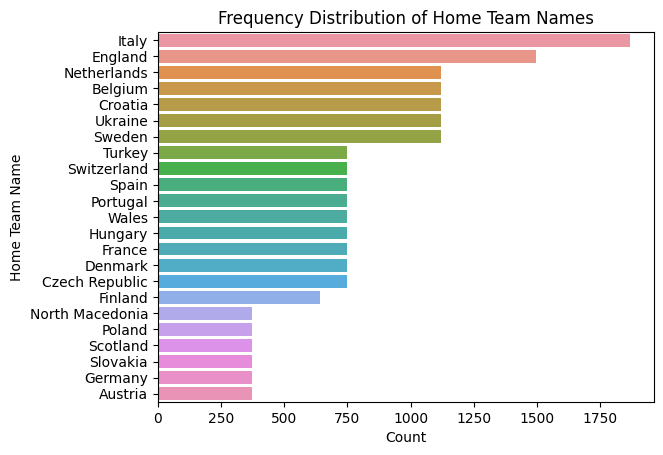

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
print(df['hometeamname'].value_counts())
sns.countplot(y='hometeamname', data=df, order=df['hometeamname'].value_counts().index)
plt.title('Frequency Distribution of Home Team Names')
plt.xlabel('Count')
plt.ylabel('Home Team Name')
plt.show()

Frequency Distribution: Count of each away team.

Spain              1496
Germany            1122
Switzerland        1122
Czech Republic     1122
Denmark            1122
England            1122
Austria            1122
Poland              748
Slovakia            748
Ukraine             748
Wales               748
France              748
North Macedonia     748
Italy               748
Belgium             748
Scotland            748
Portugal            748
Russia              642
Hungary             374
Croatia             374
Finland             374
Netherlands         374
Sweden              374
Turkey              374
Name: awayteamname, dtype: int64


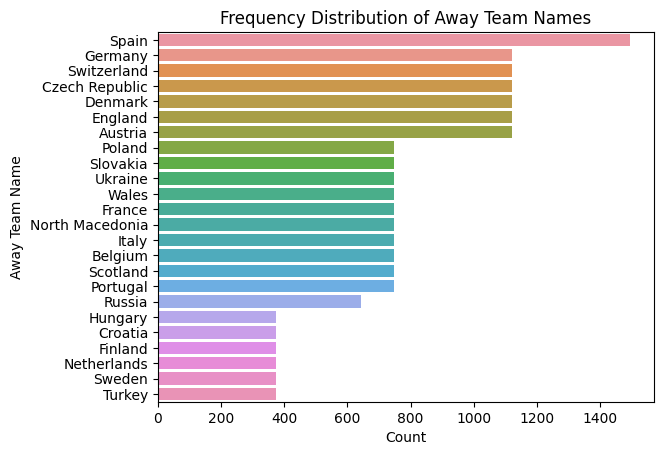

In [28]:
print(df['awayteamname'].value_counts())
sns.countplot(y='awayteamname', data=df, order=df['awayteamname'].value_counts().index)
plt.title('Frequency Distribution of Away Team Names')
plt.xlabel('Count')
plt.ylabel('Away Team Name')
plt.show()

Match Analysis:

Match Outcomes: Bar plot showing the number of home wins, away wins, and draws.

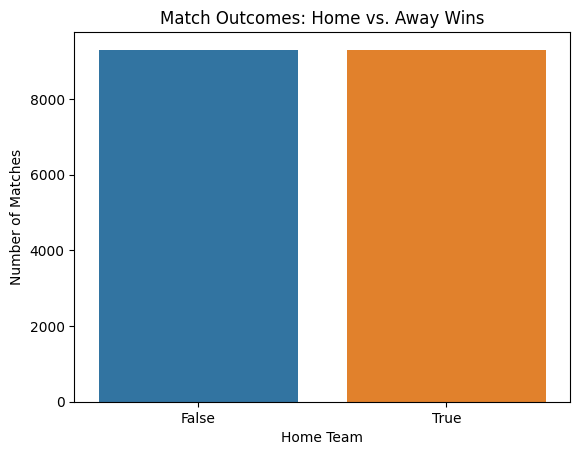

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

match_outcomes = df.groupby(['ishometeam', 'isawayteam']).size().reset_index(name='counts')
sns.barplot(x='ishometeam', y='counts',  data=match_outcomes)
plt.title('Match Outcomes: Home vs. Away Wins')
plt.xlabel('Home Team')
plt.ylabel('Number of Matches')
plt.show()

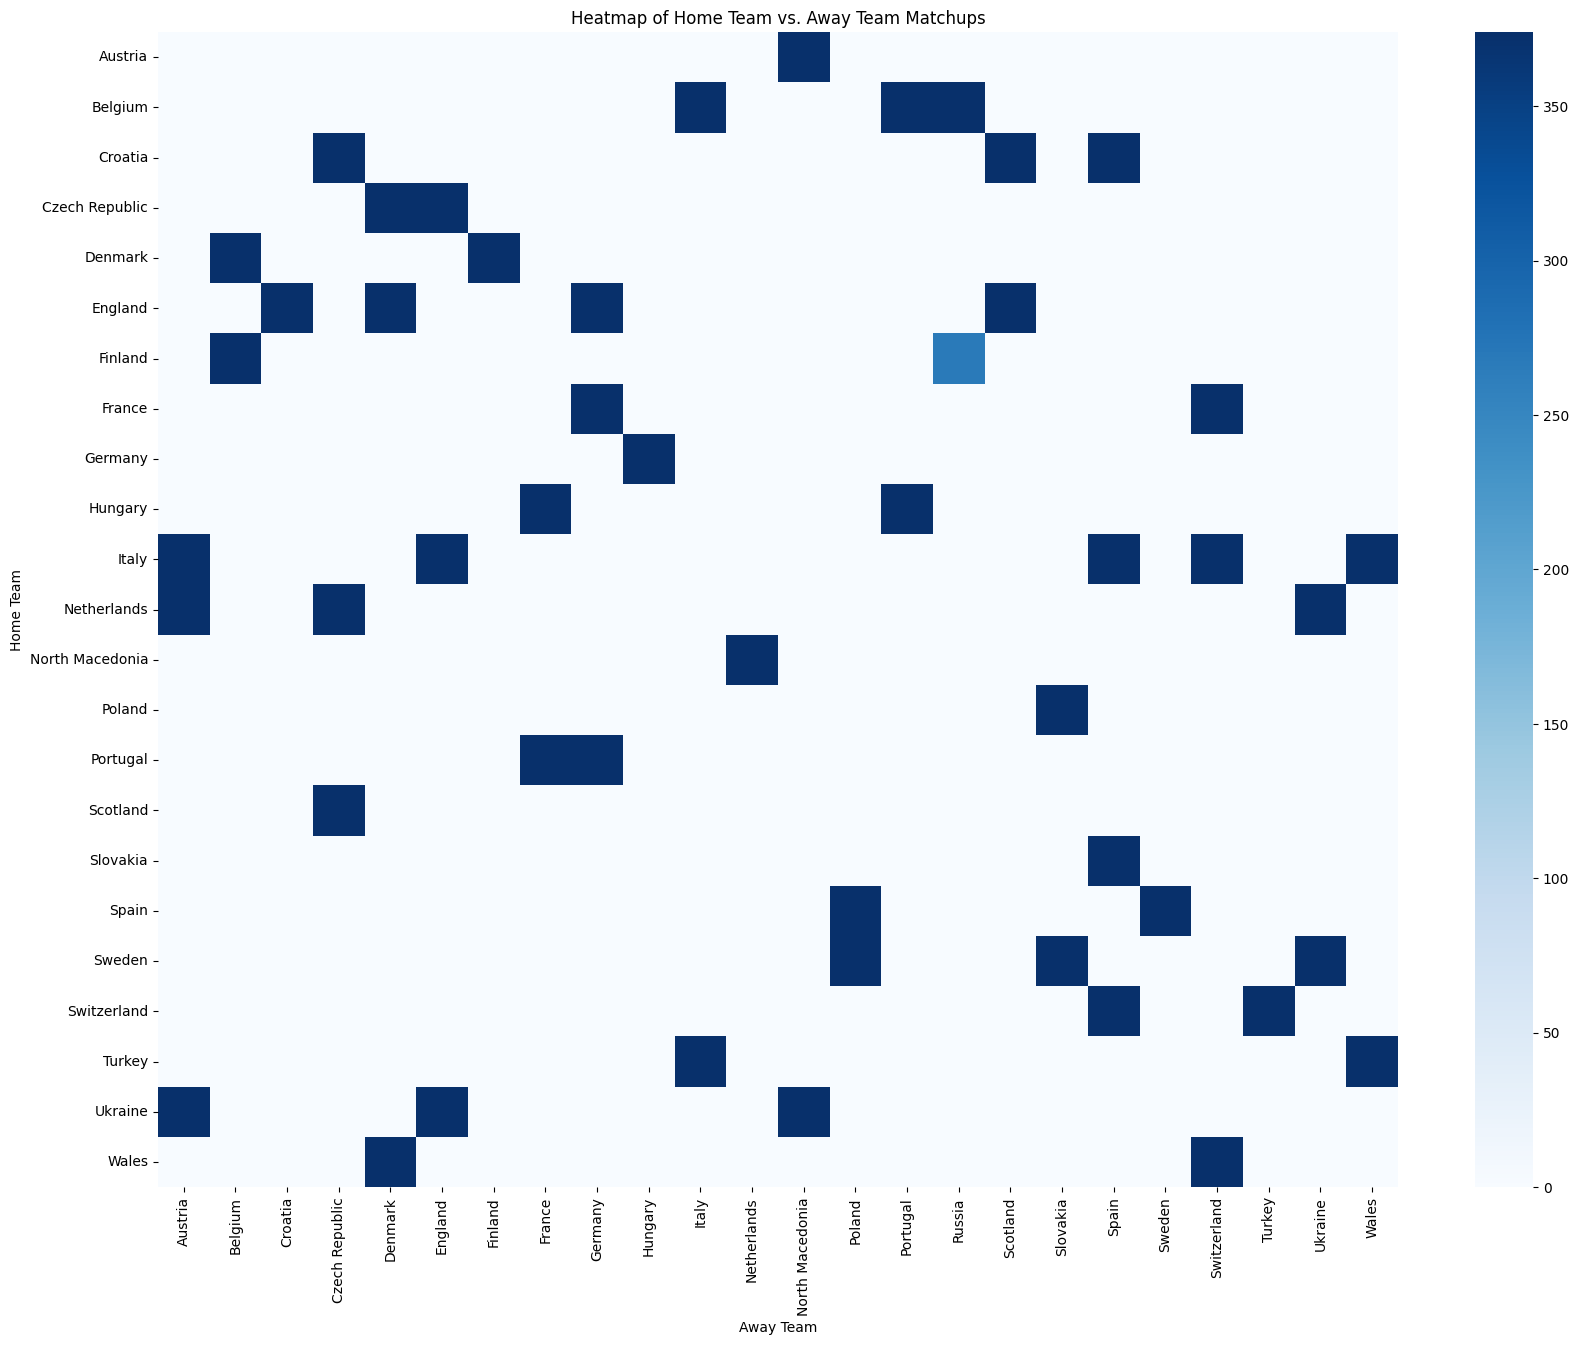

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pivot table
matchup_counts = df.pivot_table(index='hometeamname', columns='awayteamname', aggfunc='size', fill_value=0)

# Create a heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(matchup_counts, cmap='Blues', annot=False)
plt.title('Heatmap of Home Team vs. Away Team Matchups')
plt.xlabel('Away Team')
plt.ylabel('Home Team')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

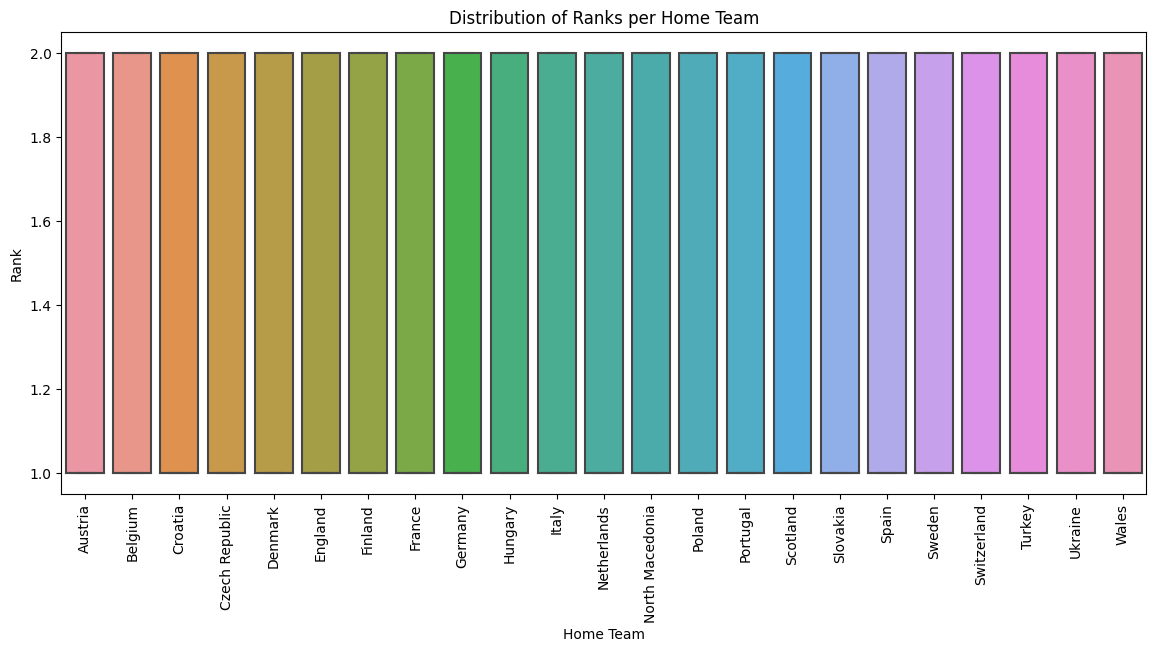

In [31]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='hometeamname', y='rank', data=df)
plt.title('Distribution of Ranks per Home Team')
plt.xlabel('Home Team')
plt.ylabel('Rank')
plt.xticks(rotation=90)
plt.show()

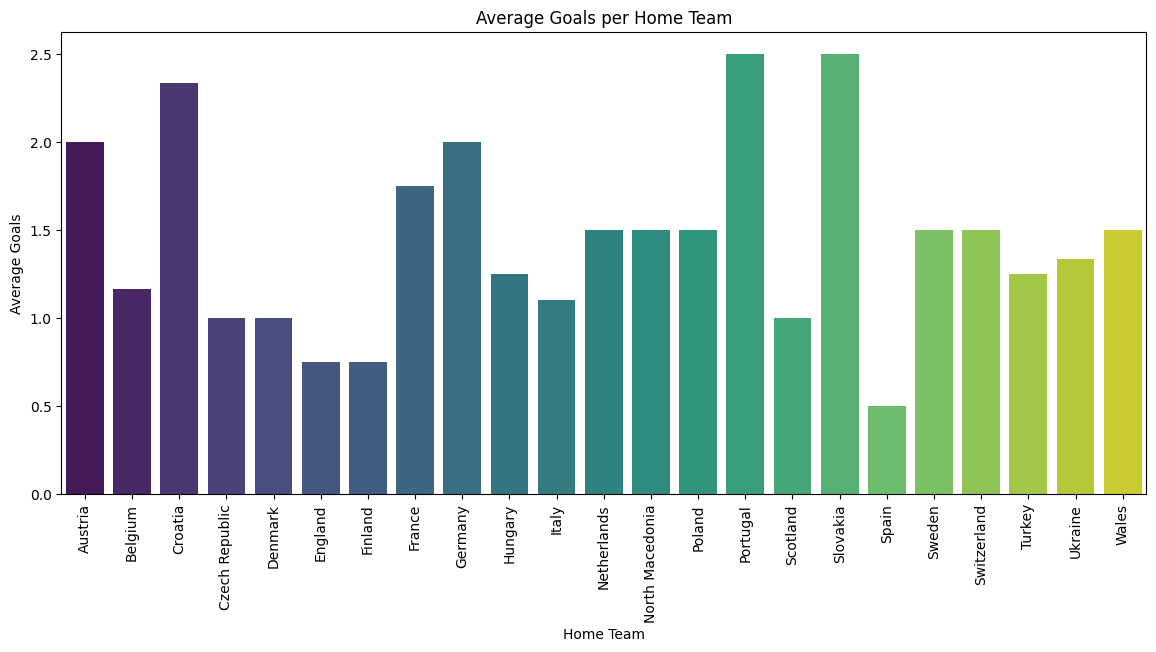

In [32]:
# Example for 'Goals'
avg_goals_per_team = df[df['statsname'] == 'Goals'].groupby('hometeamname')['value'].mean().reset_index()

plt.figure(figsize=(14, 6))
sns.barplot(x='hometeamname', y='value', data=avg_goals_per_team, palette='viridis')
plt.title('Average Goals per Home Team')
plt.xlabel('Home Team')
plt.ylabel('Average Goals')
plt.xticks(rotation=90)
plt.show()

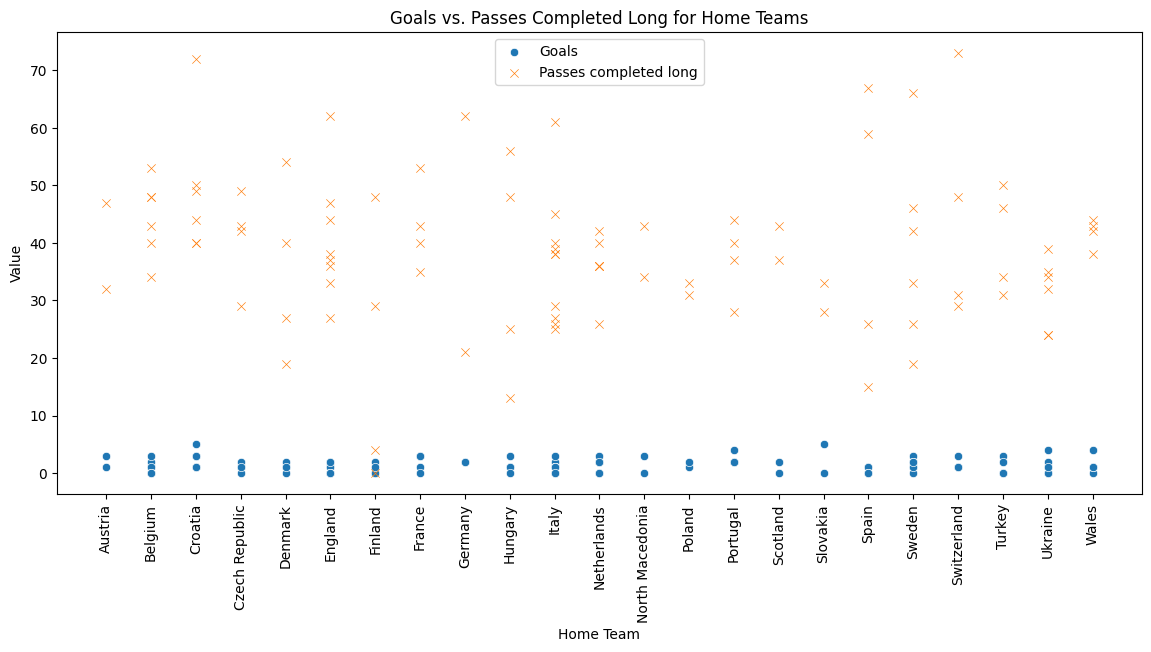

In [33]:
# Example for 'Goals' and 'Passes completed long'
plt.figure(figsize=(14, 6))

# Filter data for specific stats
goals_data = df[df['statsname'] == 'Goals']
passes_data = df[df['statsname'] == 'Passes completed long']

sns.scatterplot(x='hometeamname', y='value', data=goals_data, label='Goals')
sns.scatterplot(x='hometeamname', y='value', data=passes_data, label='Passes completed long', marker='x')
plt.title('Goals vs. Passes Completed Long for Home Teams')
plt.xlabel('Home Team')
plt.ylabel('Value')
plt.xticks(rotation=90)
plt.legend()
plt.show()

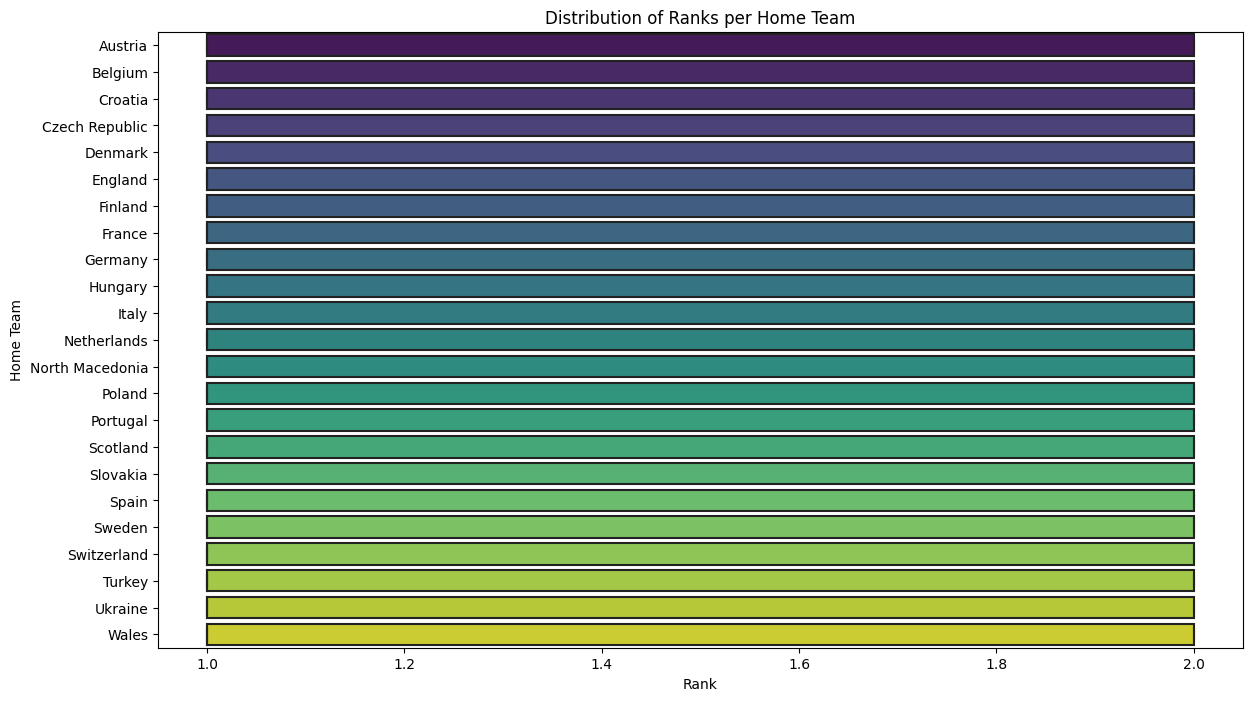

In [34]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='rank', y='hometeamname', data=df, palette='viridis')
plt.title('Distribution of Ranks per Home Team')
plt.xlabel('Rank')
plt.ylabel('Home Team')
plt.show()

# home vs. away performance

 Bar Plot: Average Value of Key Statistics for Home vs. Away

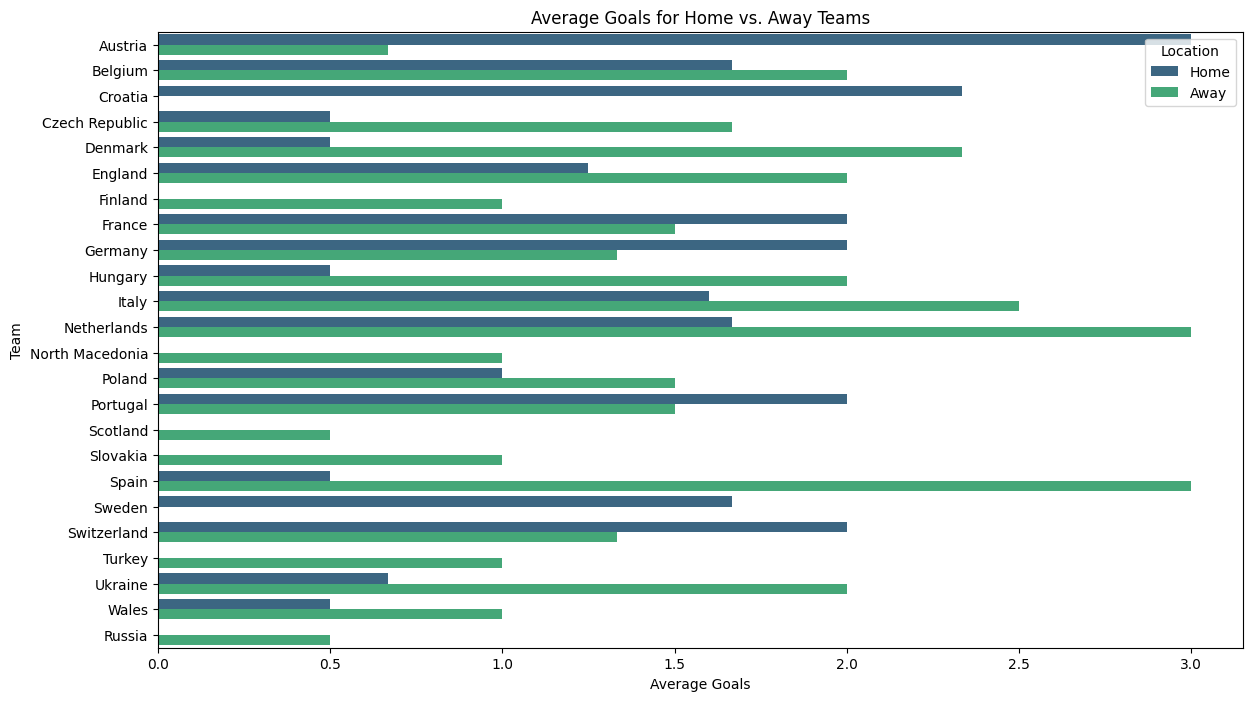

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example for 'Goals'
df_goals = df[df['statsname'] == 'Goals']

# Calculate average goals for home and away teams
home_goals = df_goals[df_goals['ishometeam'] == True].groupby('hometeamname')['value'].mean().reset_index()
home_goals['Location'] = 'Home'

away_goals = df_goals[df_goals['isawayteam'] == True].groupby('awayteamname')['value'].mean().reset_index()
away_goals['Location'] = 'Away'

# Rename columns for merging
home_goals.rename(columns={'hometeamname': 'Team', 'value': 'Average Goals'}, inplace=True)
away_goals.rename(columns={'awayteamname': 'Team', 'value': 'Average Goals'}, inplace=True)

# Combine home and away data
goals_combined = pd.concat([home_goals, away_goals])

# Plot
plt.figure(figsize=(14, 8))
sns.barplot(x='Average Goals', y='Team', hue='Location', data=goals_combined, palette='viridis')
plt.title('Average Goals for Home vs. Away Teams')
plt.xlabel('Average Goals')
plt.ylabel('Team')
plt.show()

Box Plot: Distribution of Rank for Home vs. Away Teams

C:\Users\rampr\AppData\Local\Temp\ipykernel_12740\3773185111.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Location'] = df.apply(lambda row: 'Home' if row['ishometeam'] else ('Away' if row['isawayteam'] else 'Unknown'), axis=1)


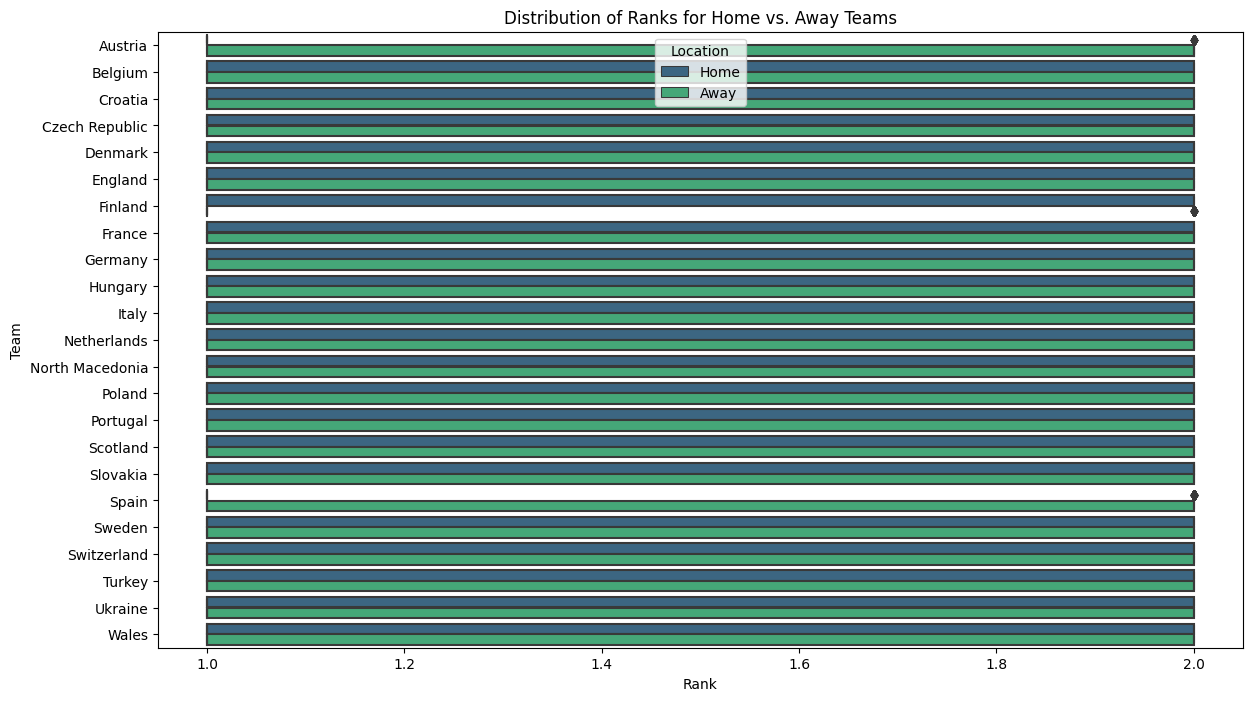

In [36]:
# Create a column indicating home or away
df['Location'] = df.apply(lambda row: 'Home' if row['ishometeam'] else ('Away' if row['isawayteam'] else 'Unknown'), axis=1)

plt.figure(figsize=(14, 8))
sns.boxplot(x='rank', y='hometeamname', hue='Location', data=df, palette='viridis')
plt.title('Distribution of Ranks for Home vs. Away Teams')
plt.xlabel('Rank')
plt.ylabel('Team')
plt.show()

Count Plot: Frequency of Home vs. Away Matches

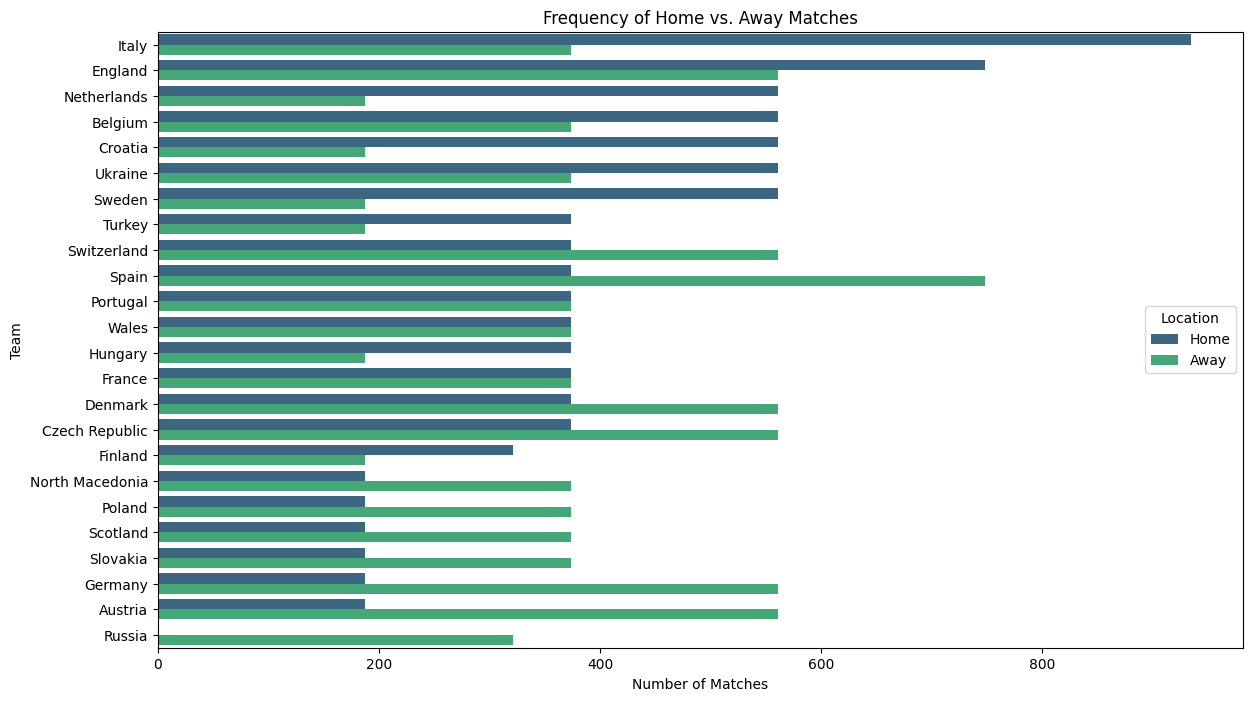

In [37]:
# Count matches for home and away teams
home_matches = df[df['ishometeam'] == True]['hometeamname'].value_counts().reset_index()
home_matches.columns = ['Team', 'Matches']
home_matches['Location'] = 'Home'

away_matches = df[df['isawayteam'] == True]['awayteamname'].value_counts().reset_index()
away_matches.columns = ['Team', 'Matches']
away_matches['Location'] = 'Away'

# Combine home and away data
matches_combined = pd.concat([home_matches, away_matches])

# Plot
plt.figure(figsize=(14, 8))
sns.barplot(x='Matches', y='Team', hue='Location', data=matches_combined, palette='viridis')
plt.title('Frequency of Home vs. Away Matches')
plt.xlabel('Number of Matches')
plt.ylabel('Team')
plt.show()

# Statistical Insights

Descriptive Statistics:

In [38]:
stats_summary = df.groupby('statsname')['value'].describe()

# Count and proportion of home and away matches
home_matches_count = df['ishometeam'].sum()
away_matches_count = df['isawayteam'].sum()
total_matches = len(df)
home_proportion = home_matches_count / total_matches
away_proportion = away_matches_count / total_matches

# Frequency and proportion of ranks 1 and 2
rank_counts = df['rank'].value_counts()
rank_proportion = df['rank'].value_counts(normalize=True)

(stats_summary, home_matches_count, away_matches_count, home_proportion, away_proportion, rank_counts, rank_proportion)

(                             count    mean        std   min    25%   50%  \
 statsname                                                                  
 Assists                      100.0   1.100   1.176367   0.0   0.00   1.0   
 Attacks from centre          100.0   6.760   4.313755   0.0   3.00   6.0   
 Attacks from left            100.0  17.050   9.022279   0.0  11.75  15.0   
 Attacks from right           100.0  16.830   9.214673   0.0  10.00  16.0   
 Attempts Accuracy            100.0  32.170  19.184935   0.0  20.00  29.5   
 ...                            ...     ...        ...   ...    ...   ...   
 Top Speed (Km/h)             100.0  31.686   1.071204  28.8  31.00  31.7   
 Total Attacks                100.0  40.640  19.085411   0.0  28.00  37.5   
 Total Attempts               100.0  12.050   6.191188   0.0   7.00  11.0   
 Woodwork (after deflection)  100.0   0.400   0.619547   0.0   0.00   0.0   
 Yellow cards                 100.0   1.480   1.176195   0.0   1.00   1.0   

Correlation Analysis:

In [39]:
# Compare average values of key statistics for home vs. away teams
home_stats_avg = df[df['ishometeam'] == True].groupby('statsname')['value'].mean().reset_index()
away_stats_avg = df[df['isawayteam'] == True].groupby('statsname')['value'].mean().reset_index()

# Compare rank distributions for home vs. away teams
home_rank_distribution = df[df['ishometeam'] == True]['rank'].value_counts(normalize=True)
away_rank_distribution = df[df['isawayteam'] == True]['rank'].value_counts(normalize=True)

(home_stats_avg, away_stats_avg, home_rank_distribution, away_rank_distribution)

(                       statsname   value
 0                        Assists   0.900
 1            Attacks from centre   6.560
 2              Attacks from left  17.960
 3             Attacks from right  15.980
 4              Attempts Accuracy  30.240
 ..                           ...     ...
 182             Top Speed (Km/h)  31.802
 183                Total Attacks  40.500
 184               Total Attempts  12.120
 185  Woodwork (after deflection)   0.400
 186                 Yellow cards   1.380
 
 [187 rows x 2 columns],
                        statsname  value
 0                        Assists   1.30
 1            Attacks from centre   6.96
 2              Attacks from left  16.14
 3             Attacks from right  17.68
 4              Attempts Accuracy  34.10
 ..                           ...    ...
 182             Top Speed (Km/h)  31.57
 183                Total Attacks  40.78
 184               Total Attempts  11.98
 185  Woodwork (after deflection)   0.40
 186              

In [40]:
# Pivot the dataframe to get a correlation matrix for different statistics
stats_pivot = df.pivot_table(values='value', index=['matchid', 'hometeamname', 'awayteamname'], columns='statsname', aggfunc='mean')

# Compute the correlation matrix
correlation_matrix = stats_pivot.corr()

correlation_matrix

statsname,Assists,Attacks from centre,Attacks from left,Attacks from right,Attempts Accuracy,Attempts against woodwork,Attempts blocked,Attempts blocked outside penalty area,Attempts from corner,Attempts in open play,...,Throw-in,Time spent in high activity (%),Time spent in low activity (%),Time spent in medium activity (%),Time spent in very high activity (%),Top Speed (Km/h),Total Attacks,Total Attempts,Woodwork (after deflection),Yellow cards
statsname,,,,,,,,,,,,,,,,,,,,,
Assists,1.000000,0.278278,0.114378,0.226275,0.299719,0.322912,0.100302,0.068062,-0.024861,0.379345,...,0.155738,-0.035003,0.014484,-0.068150,0.206439,0.039143,0.244655,0.400424,0.228802,0.112706
Attacks from centre,0.278278,1.000000,0.475988,0.289835,0.180175,0.123672,0.393944,0.352860,0.338289,0.591820,...,0.556737,0.029096,-0.028303,-0.032066,0.167122,0.019711,0.659934,0.696577,0.101858,0.316704
Attacks from left,0.114378,0.475988,1.000000,0.293794,0.012708,0.107131,0.478801,0.303560,0.232560,0.485384,...,0.541469,-0.093126,0.020511,0.030623,0.029555,0.158061,0.835695,0.608955,0.237131,0.128855
Attacks from right,0.226275,0.289835,0.293794,1.000000,0.090963,0.331735,0.217041,-0.062551,0.289417,0.232126,...,0.465301,-0.065890,-0.014443,0.129246,-0.142058,-0.194703,0.730188,0.397800,0.257231,-0.091197
Attempts Accuracy,0.299719,0.180175,0.012708,0.090963,1.000000,-0.036334,-0.210302,-0.303060,-0.034946,-0.027144,...,0.140535,-0.205430,0.195816,-0.191215,0.045277,-0.076005,0.095858,0.110826,-0.046460,-0.105748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Top Speed (Km/h),0.039143,0.019711,0.158061,-0.194703,-0.076005,0.090722,0.182034,0.210656,0.003143,0.171384,...,-0.033862,-0.024607,0.089194,-0.246649,0.316287,1.000000,0.000291,0.128608,0.017634,0.100683
Total Attacks,0.244655,0.659934,0.835695,0.730188,0.095858,0.254506,0.478073,0.257431,0.393357,0.593911,...,0.675589,-0.078818,-0.002179,0.073191,-0.011907,0.000291,1.000000,0.715425,0.287469,0.106662
Total Attempts,0.400424,0.696577,0.608955,0.397800,0.110826,0.161781,0.724993,0.590338,0.237792,0.986911,...,0.508658,-0.101726,0.067172,-0.073370,0.112579,0.128608,0.715425,1.000000,0.185615,0.216845


Team Performance Analysis:

In [41]:
# Identify top-performing teams based on average values of key statistics
top_performing_teams = df.groupby('teamname')['value'].mean().reset_index().sort_values(by='value', ascending=False)

# Analyze consistency in team performance by looking at the variance in key statistics
team_performance_variance = df.groupby('teamname')['value'].var().reset_index().sort_values(by='value')

(top_performing_teams, team_performance_variance)

(           teamname        value
 15           Russia  2121.929829
 18            Spain  2062.677952
 10            Italy  2014.911444
 19           Sweden  1917.553225
 0           Austria  1901.200551
 20      Switzerland  1858.653686
 5           England  1850.053824
 6           Finland  1842.569360
 3    Czech Republic  1822.610902
 4           Denmark  1795.479842
 7            France  1779.459049
 22          Ukraine  1774.520030
 1           Belgium  1755.066740
 9           Hungary  1750.887494
 8           Germany  1750.660378
 2           Croatia  1739.554500
 16         Scotland  1722.658201
 12  North Macedonia  1693.461879
 14         Portugal  1693.093142
 13           Poland  1691.564447
 17         Slovakia  1690.577718
 21           Turkey  1652.808121
 11      Netherlands  1635.058782
 23            Wales  1569.360904,
            teamname         value
 23            Wales  8.649208e+07
 11      Netherlands  9.116491e+07
 21           Turkey  9.563626e+07
 14      

Distribution of Values

Count Plots for Categorical Variables

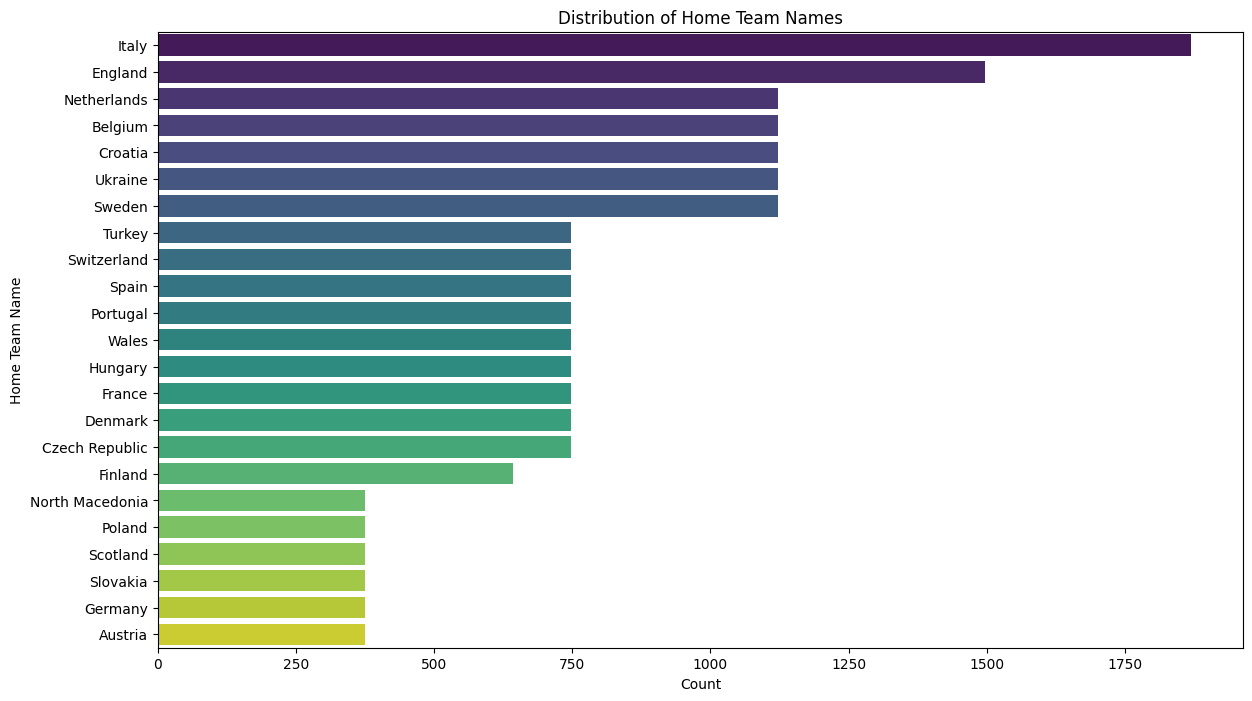

In [42]:
plt.figure(figsize=(14, 8))
sns.countplot(y='hometeamname', data=df, order=df['hometeamname'].value_counts().index, palette='viridis')
plt.title('Distribution of Home Team Names')
plt.xlabel('Count')
plt.ylabel('Home Team Name')
plt.show()

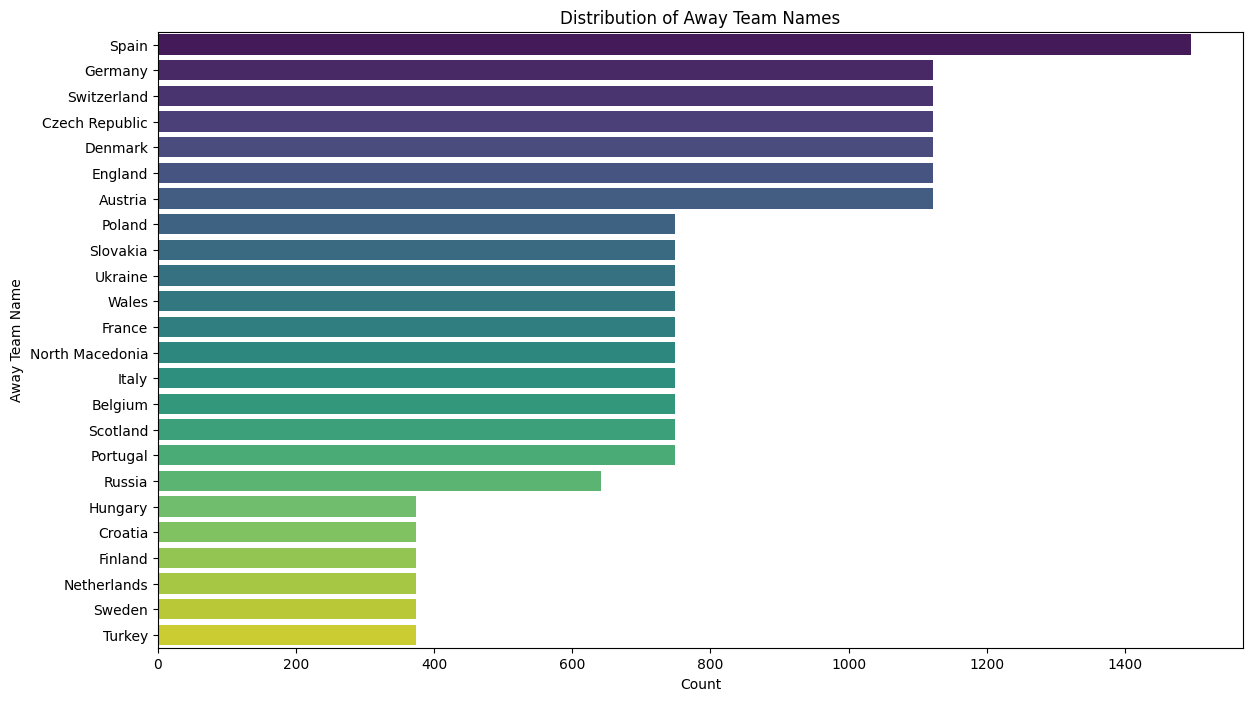

In [43]:
plt.figure(figsize=(14, 8))
sns.countplot(y='awayteamname', data=df, order=df['awayteamname'].value_counts().index, palette='viridis')
plt.title('Distribution of Away Team Names')
plt.xlabel('Count')
plt.ylabel('Away Team Name')
plt.show()

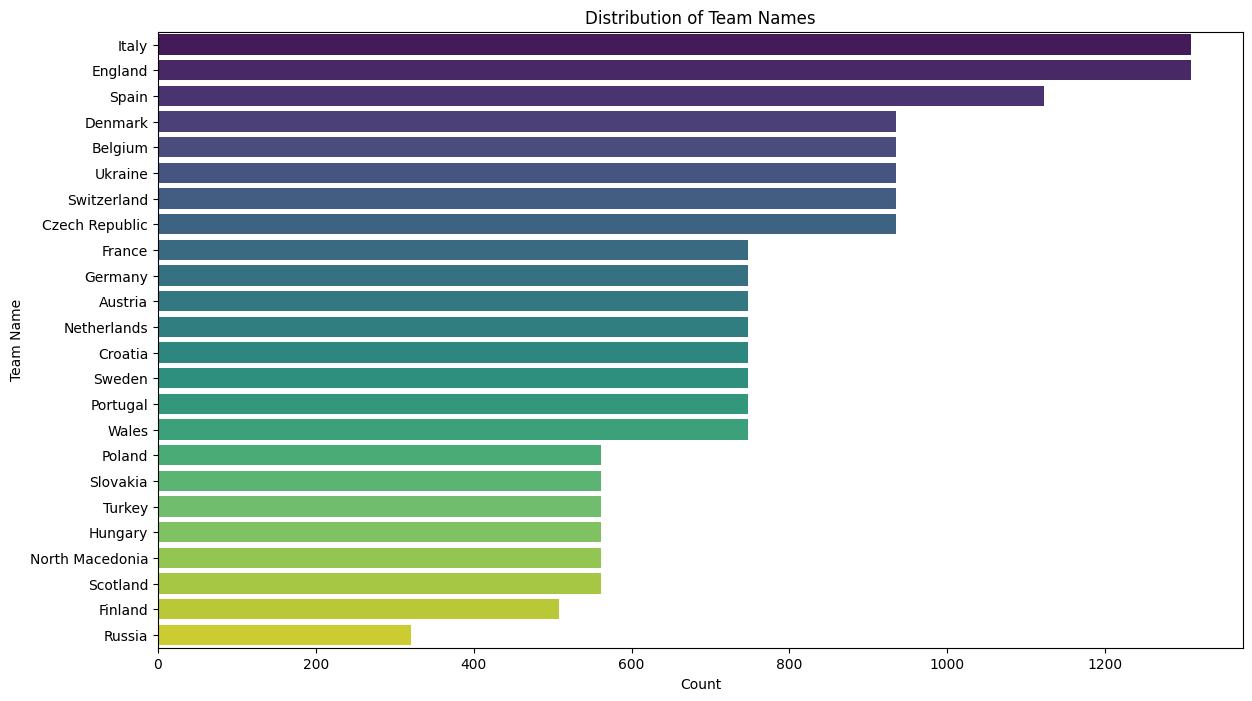

In [44]:
plt.figure(figsize=(14, 8))
sns.countplot(y='teamname', data=df, order=df['teamname'].value_counts().index, palette='viridis')
plt.title('Distribution of Team Names')
plt.xlabel('Count')
plt.ylabel('Team Name')
plt.show()

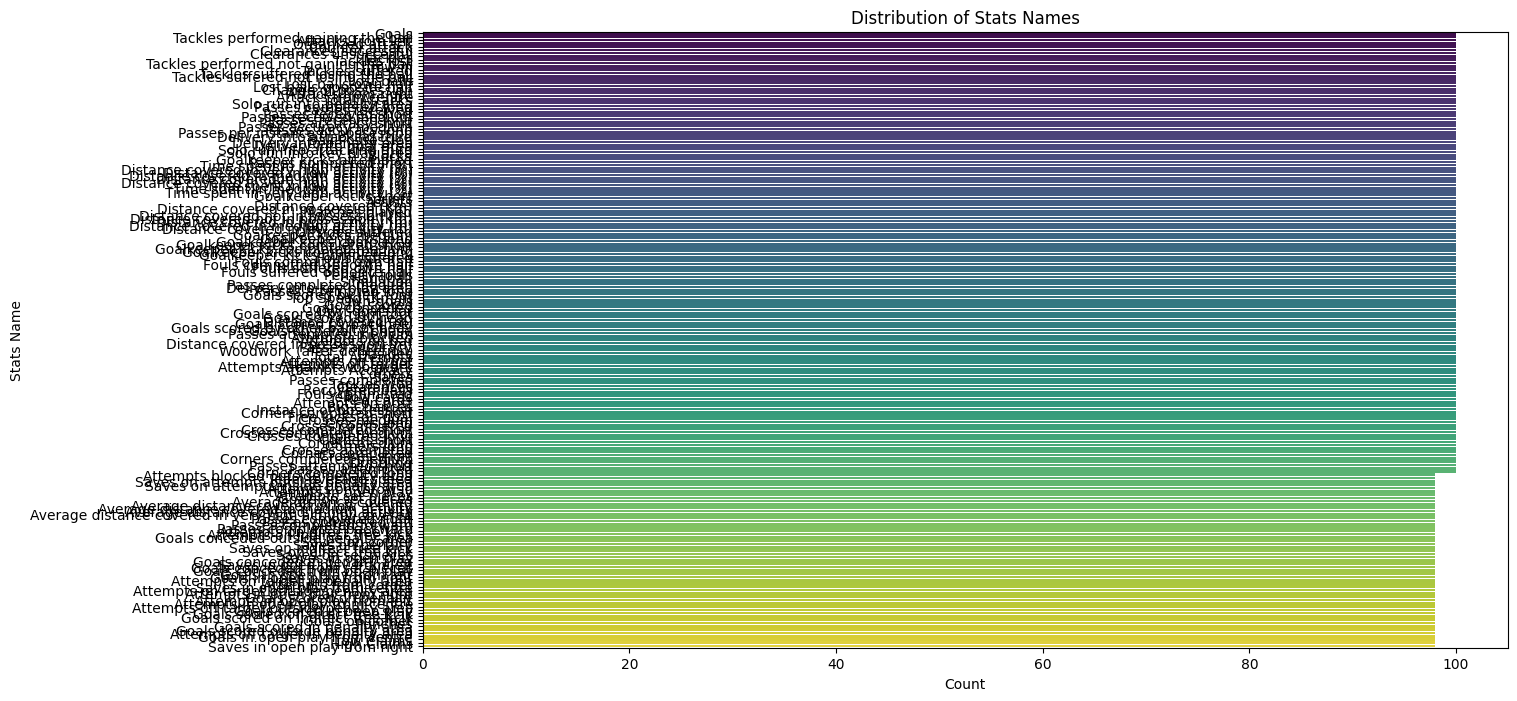

In [45]:
plt.figure(figsize=(14, 8))
sns.countplot(y='statsname', data=df, order=df['statsname'].value_counts().index, palette='viridis')
plt.title('Distribution of Stats Names')
plt.xlabel('Count')
plt.ylabel('Stats Name')
plt.show()

Histograms for Numerical Variables

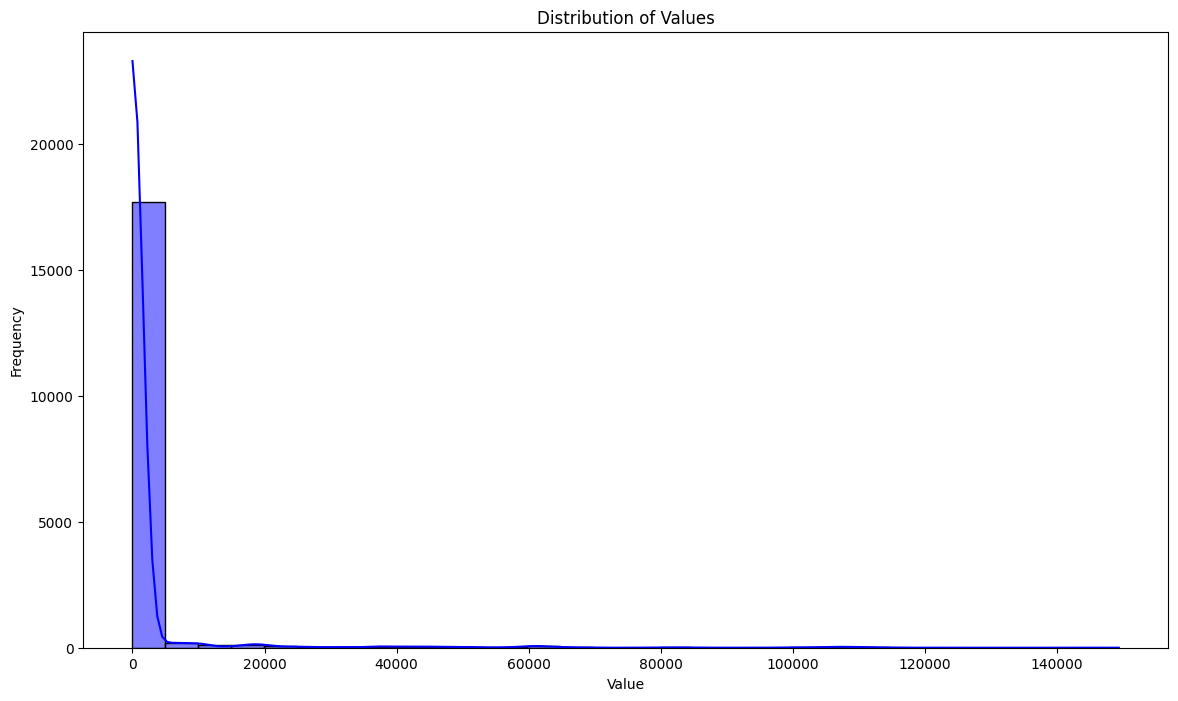

In [46]:
plt.figure(figsize=(14, 8))
sns.histplot(df['value'], kde=True, bins=30, color='blue')
plt.title('Distribution of Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

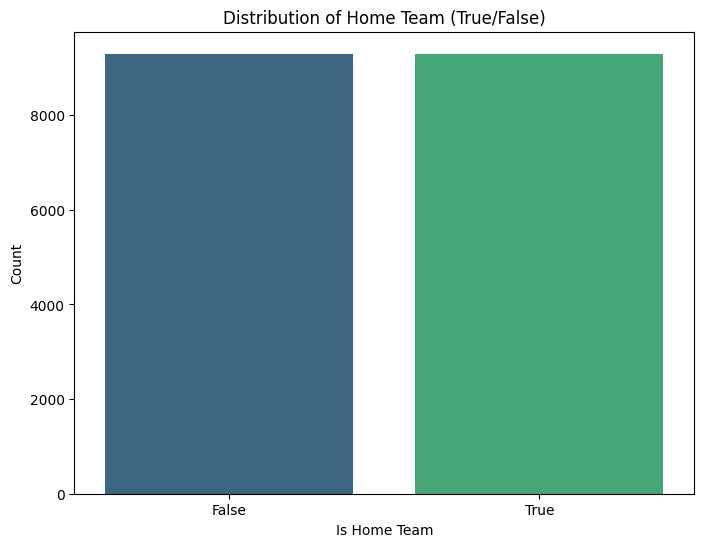

In [47]:
plt.figure(figsize=(8, 6))
sns.countplot(x='ishometeam', data=df, palette='viridis')
plt.title('Distribution of Home Team (True/False)')
plt.xlabel('Is Home Team')
plt.ylabel('Count')
plt.show()

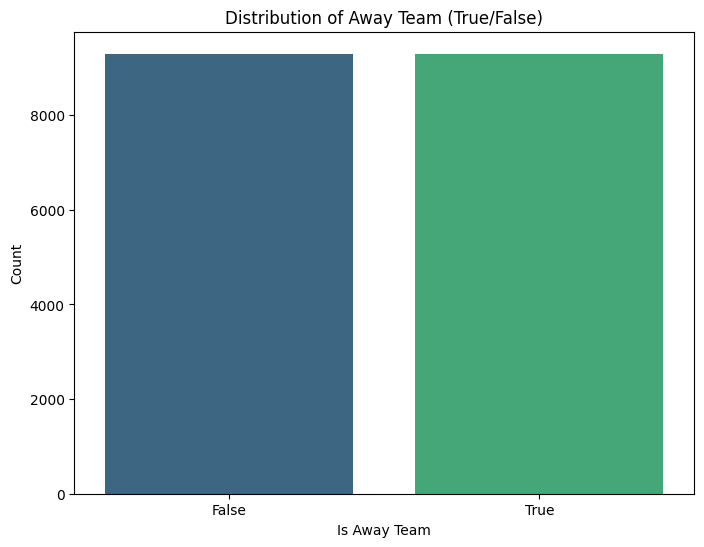

In [48]:
plt.figure(figsize=(8, 6))
sns.countplot(x='isawayteam', data=df, palette='viridis')
plt.title('Distribution of Away Team (True/False)')
plt.xlabel('Is Away Team')
plt.ylabel('Count')
plt.show()

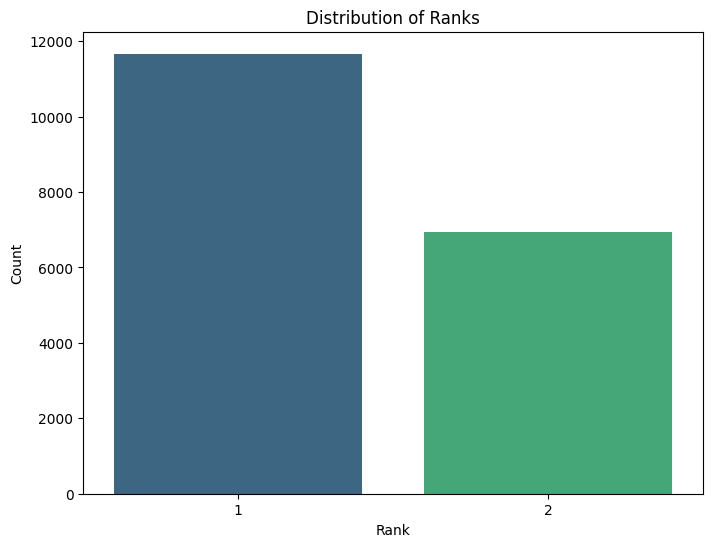

In [49]:
plt.figure(figsize=(8, 6))
sns.countplot(x='rank', data=df, palette='viridis')
plt.title('Distribution of Ranks')
plt.xlabel('Rank')
plt.ylabel('Count')
plt.show()

Comparative Analysis

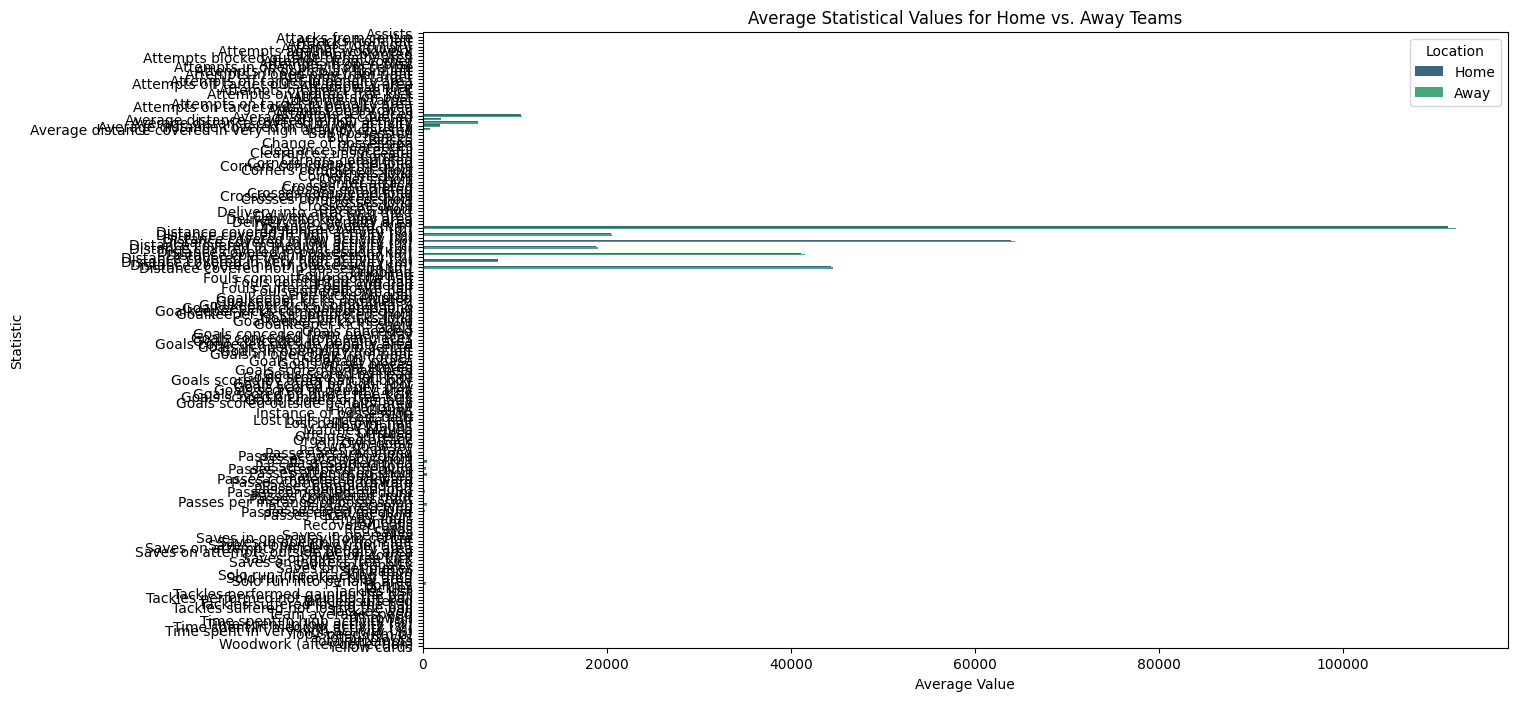

In [50]:
# Calculate average values for each statsname by home and away teams
home_stats_avg = df[df['ishometeam'] == True].groupby('statsname')['value'].mean().reset_index()
away_stats_avg = df[df['isawayteam'] == True].groupby('statsname')['value'].mean().reset_index()

# Add a 'Location' column for distinguishing home and away
home_stats_avg['Location'] = 'Home'
away_stats_avg['Location'] = 'Away'

# Combine home and away data
stats_combined = pd.concat([home_stats_avg, away_stats_avg])

# Plot
plt.figure(figsize=(14, 8))
sns.barplot(x='value', y='statsname', hue='Location', data=stats_combined, palette='viridis')
plt.title('Average Statistical Values for Home vs. Away Teams')
plt.xlabel('Average Value')
plt.ylabel('Statistic')
plt.show()

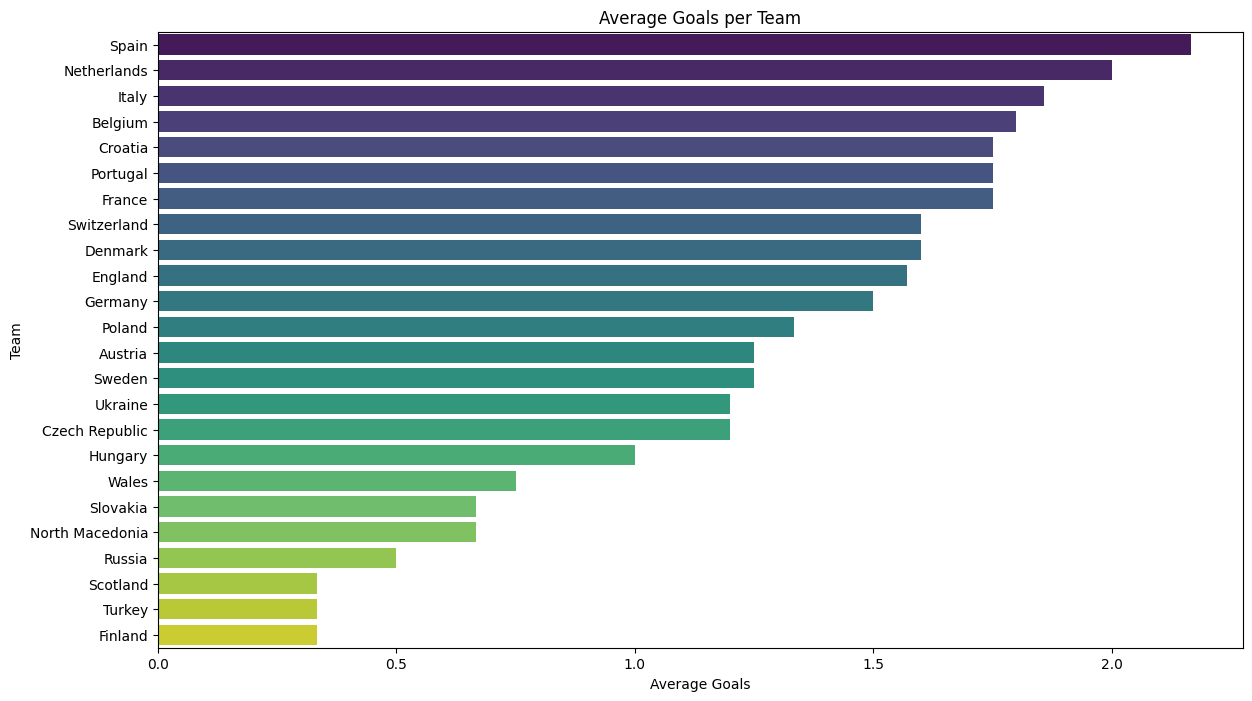

In [51]:
# Example for 'Goals'
df_goals = df[df['statsname'] == 'Goals']

# Calculate average goals for each team
avg_goals_per_team = df_goals.groupby('teamname')['value'].mean().reset_index()

plt.figure(figsize=(14, 8))
sns.barplot(x='value', y='teamname', data=avg_goals_per_team.sort_values(by='value', ascending=False), palette='viridis')
plt.title('Average Goals per Team')
plt.xlabel('Average Goals')
plt.ylabel('Team')
plt.show()

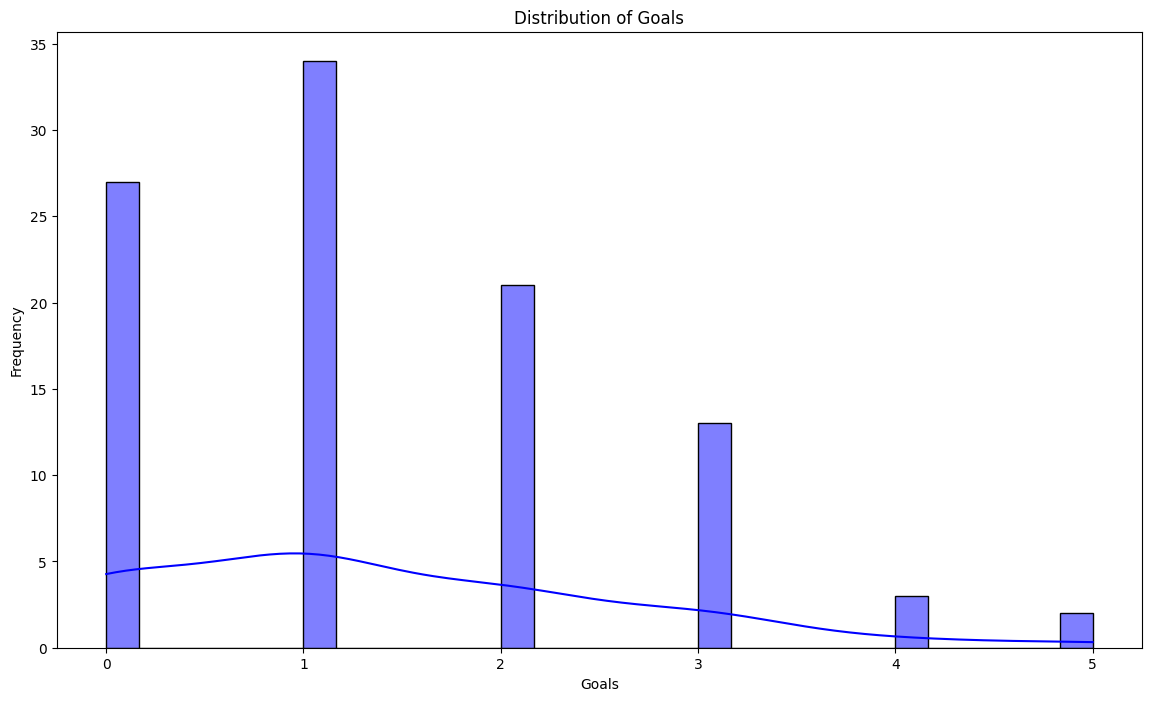

In [52]:
plt.figure(figsize=(14, 8))
sns.histplot(df[df['statsname'] == 'Goals']['value'], kde=True, bins=30, color='blue')
plt.title('Distribution of Goals')
plt.xlabel('Goals')
plt.ylabel('Frequency')
plt.show()

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


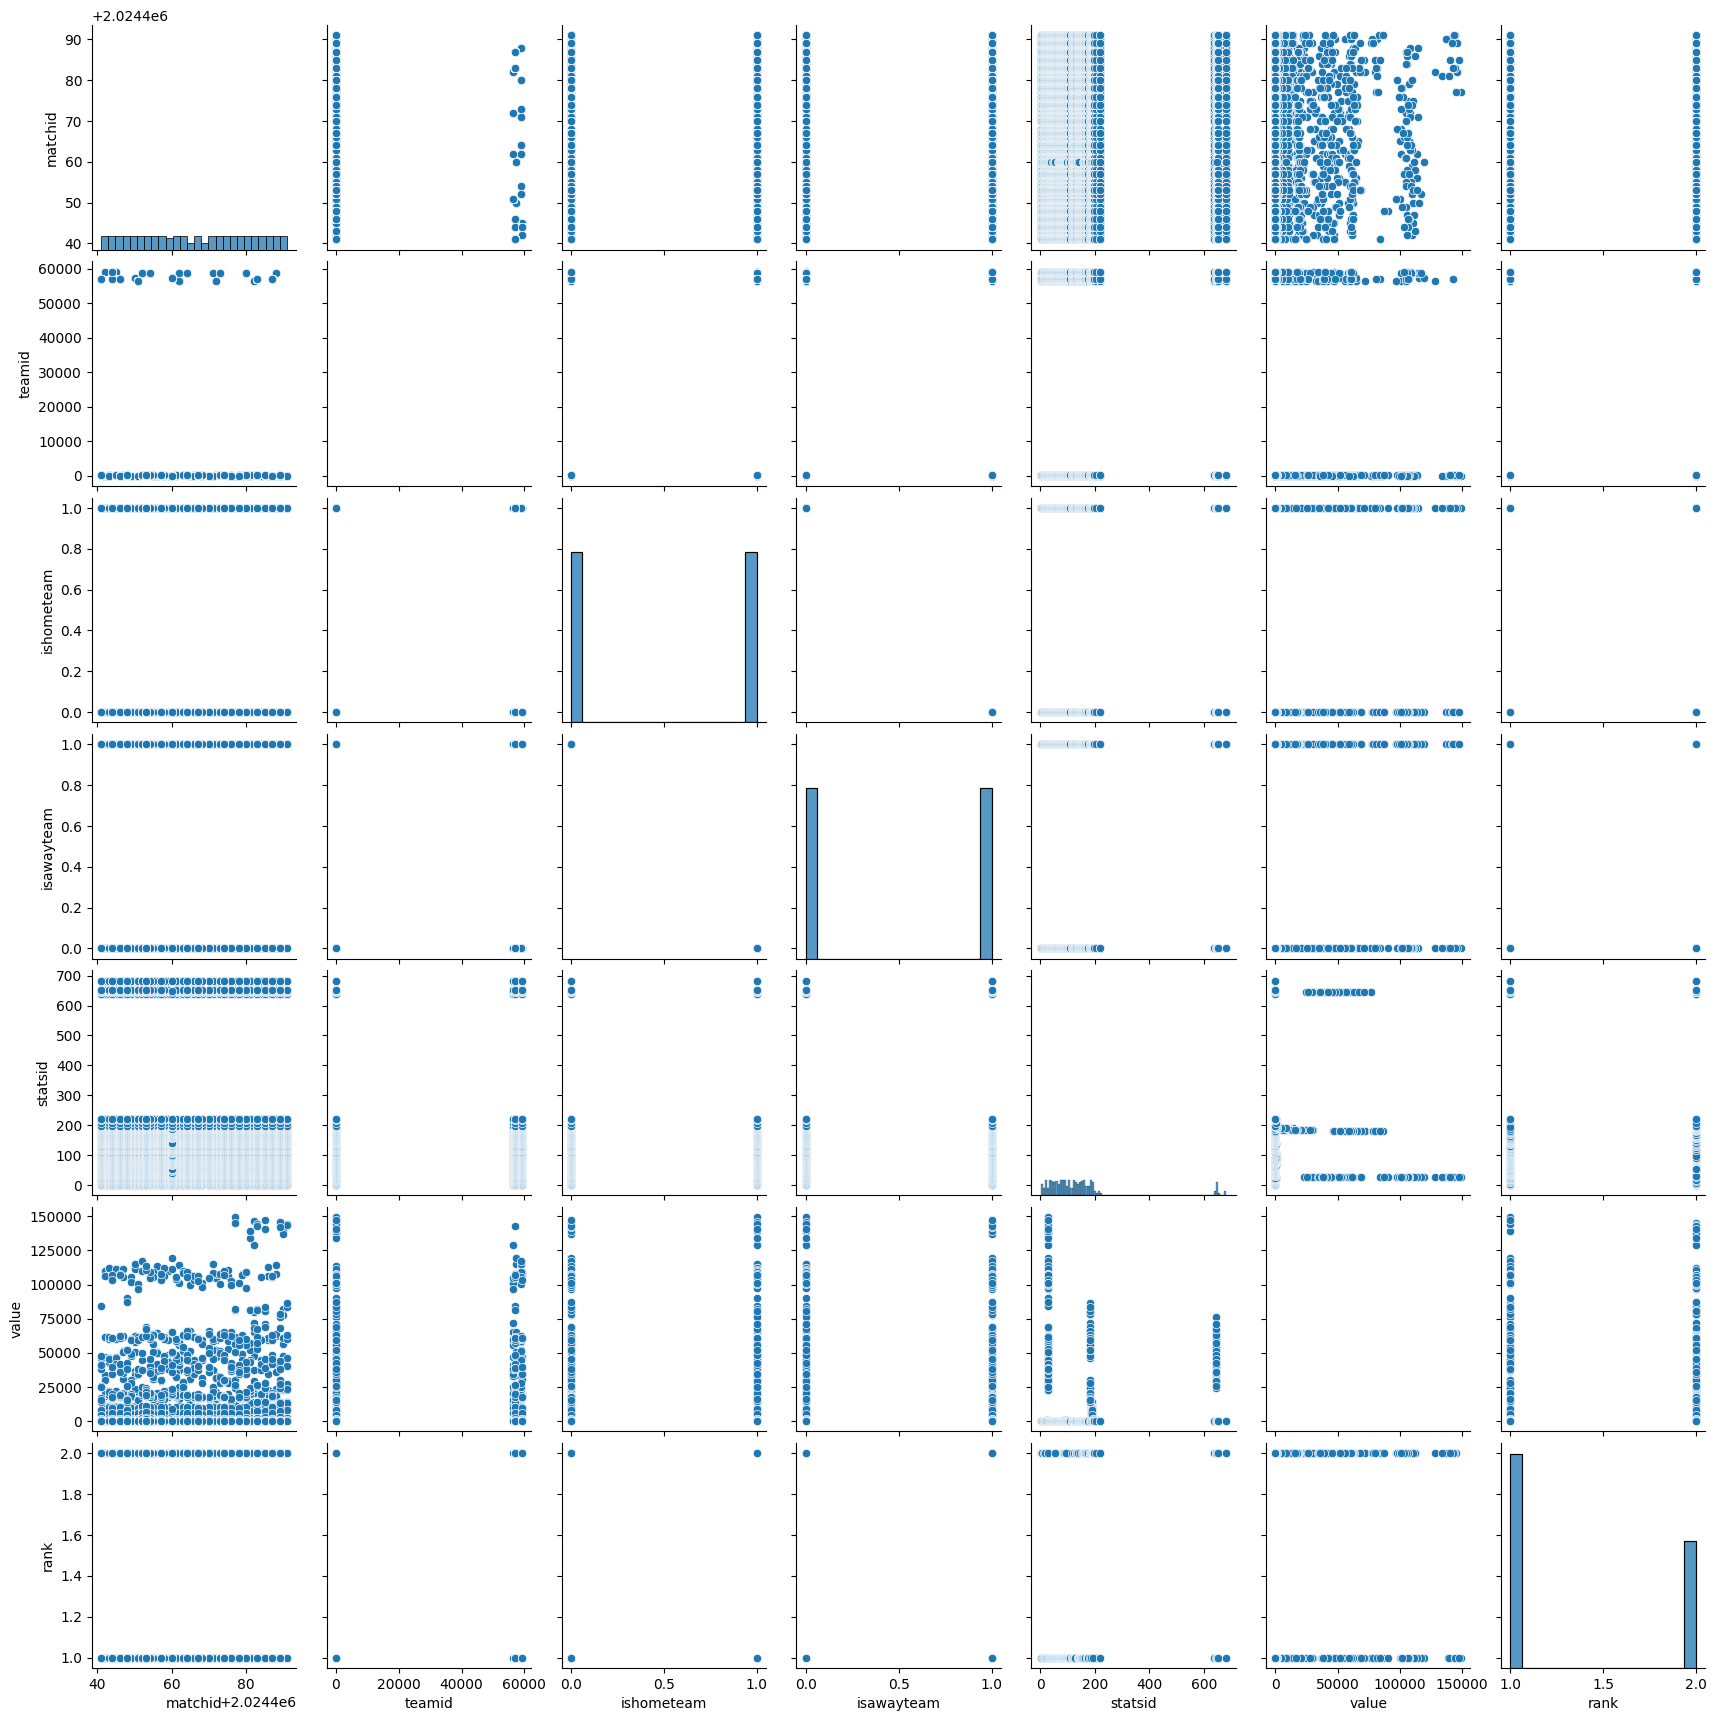

In [53]:
import seaborn as sns
sns.pairplot(df)

In [54]:
pip install ydata-profiling==4.0.0

  Using cached ydata_profiling-4.0.0-py2.py3-none-any.whl.metadata (20 kB)
     ---------------------------------------- 0.0/152.5 kB ? eta -:--:--
     ---------------------------------------- 0.0/152.5 kB ? eta -:--:--
     ---------------------------------------- 0.0/152.5 kB ? eta -:--:--
     ---------------------------------------- 0.0/152.5 kB ? eta -:--:--
     -- ------------------------------------- 10.2/152.5 kB ? eta -:--:--
     --------- --------------------------- 41.0/152.5 kB 245.8 kB/s eta 0:00:01
     --------------------------------- -- 143.4/152.5 kB 711.9 kB/s eta 0:00:01
     ------------------------------------ 152.5/152.5 kB 700.6 kB/s eta 0:00:00
  Using cached requests-2.28.2-py3-none-any.whl.metadata (4.6 kB)
  Using cached typeguard-2.13.3-py3-none-any.whl.metadata (3.6 kB)
Using cached ydata_profiling-4.0.0-py2.py3-none-any.whl (344 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   --- ------------------------------------ 0.2/2.2 

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.88 requires PyYAML>=6.0.1, but you have pyyaml 5.4.1 which is incompatible.
conda-repo-cli 1.0.88 requires requests>=2.31.0, but you have requests 2.28.2 which is incompatible.
connexion 2.9.0 requires jsonschema<4,>=2.5.1, but you have jsonschema 4.19.2 which is incompatible.
jupyterlab-server 2.27.2 requires jinja2>=3.0.3, but you have jinja2 2.11.3 which is incompatible.
jupyterlab-server 2.27.2 requires requests>=2.31, but you have requests 2.28.2 which is incompatible.
mlflow 2.13.2 requires Jinja2<4,>=3.0; platform_system == "Windows", but you have jinja2 2.11.3 which is incompatible.


In [55]:
'''from ydata_profiling import ProfileReport

# Produce and save the profiling report
profile = ProfileReport(df,title="Match Statistics Profile Report")
profile.to_file("report.html")'''

'from ydata_profiling import ProfileReport\n\n# Produce and save the profiling report\nprofile = ProfileReport(df,title="Match Statistics Profile Report")\nprofile.to_file("report.html")'

In [57]:
df.to_csv("eda-matchteam-statistics.csv", index=False)